In [1]:

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = yf.download('BTC-USD','2021-01-01','2024-11-30')

/tmp/ipython-input-2116082740.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('BTC-USD','2021-01-01','2024-11-30')
[*********************100%***********************]  1 of 1 completed


In [4]:
data = pd.DataFrame(data)

In [5]:
data


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2021-01-01,29374.152344,29600.626953,28803.585938,28994.009766,40730301359
2021-01-02,32127.267578,33155.117188,29091.181641,29376.455078,67865420765
2021-01-03,32782.023438,34608.558594,32052.316406,32129.408203,78665235202
2021-01-04,31971.914062,33440.218750,28722.755859,32810.949219,81163475344
2021-01-05,33992.429688,34437.589844,30221.187500,31977.041016,67547324782
...,...,...,...,...,...
2024-11-25,93102.296875,98935.031250,92642.914062,98033.445312,80909462490
2024-11-26,91985.320312,94991.750000,90770.812500,93087.281250,91656519855


In [6]:

data.shape


(1429, 5)

In [7]:
data.reset_index(inplace=True)

In [8]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
0,2021-01-01,29374.152344,29600.626953,28803.585938,28994.009766,40730301359
1,2021-01-02,32127.267578,33155.117188,29091.181641,29376.455078,67865420765
2,2021-01-03,32782.023438,34608.558594,32052.316406,32129.408203,78665235202
3,2021-01-04,31971.914062,33440.218750,28722.755859,32810.949219,81163475344
4,2021-01-05,33992.429688,34437.589844,30221.187500,31977.041016,67547324782
...,...,...,...,...,...,...
1424,2024-11-25,93102.296875,98935.031250,92642.914062,98033.445312,80909462490
1425,2024-11-26,91985.320312,94991.750000,90770.812500,93087.281250,91656519855
1426,2024-11-27,95962.531250,97361.179688,91778.664062,91978.140625,71133452438


In [10]:
data.drop(columns = ['Date','Open','High','Low','Volume'],inplace=True)

/tmp/ipython-input-1932185422.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data.drop(columns = ['Date','Open','High','Low','Volume'],inplace=True)


In [11]:

data

Price,Close
Ticker,BTC-USD
0,29374.152344
1,32127.267578
2,32782.023438
3,31971.914062
4,33992.429688
...,...
1424,93102.296875
1425,91985.320312
1426,95962.531250


<function matplotlib.pyplot.show(close=None, block=None)>

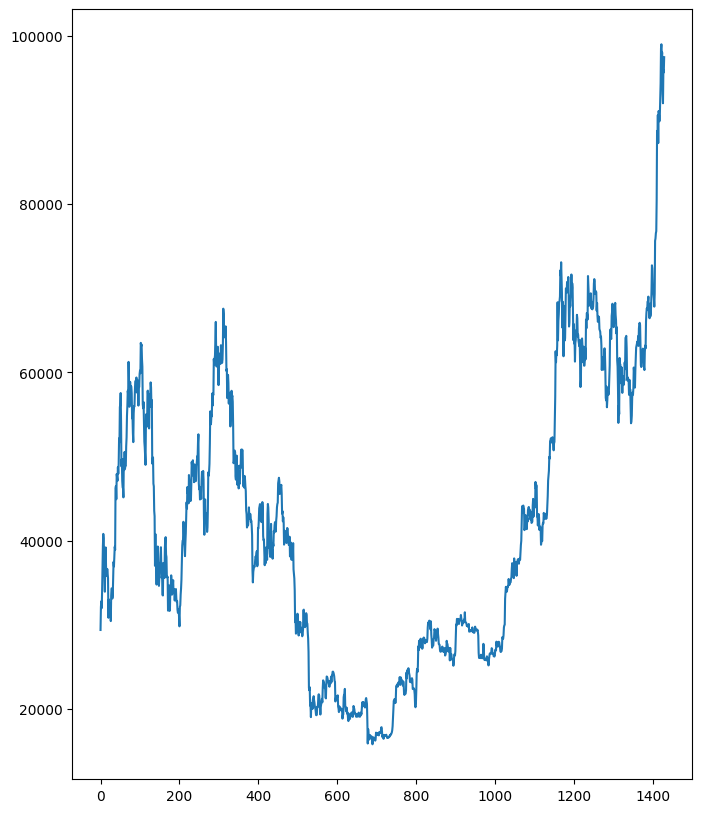

In [13]:


plt.figure(figsize=(8,10))
plt.plot(data)
plt.show

In [14]:
train_data = data[:-100]
test_data = data[-100:]


In [15]:
train_data.shape


(1329, 1)

In [16]:
test_data.shape

(100, 1)

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
train_data_scale = scaler.fit_transform(train_data)

In [19]:

base_days = 100

In [20]:
x = []
y = []
for i in range(base_days, train_data_scale.shape[0]):
    x.append(train_data_scale[i-base_days:i])
    y.append(train_data_scale[i,0])

In [21]:
x, y = np.array(x), np.array(y)

In [22]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [23]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential

In [24]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences=True, input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(60, activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(80, activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [27]:
model.fit(x, y, epochs = 50, verbose =1 )

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 18s 271ms/step - loss: 0.1280
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 20s 251ms/step - loss: 0.0171
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 322ms/step - loss: 0.0121
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 263ms/step - loss: 0.0110
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 13s 329ms/step - loss: 0.0110
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 11s 289ms/step - loss: 0.0104
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 21s 309ms/step - loss: 0.0089
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 239ms/step - loss: 0.0087
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 11s 266ms/step - loss: 0.0109
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 23s 335ms/step - loss: 0.0088
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 19s 293ms/step - loss: 0.0091
Epoch 12/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 18s 232ms/step - loss: 0.0081
Epoch 13/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 263ms/step - loss: 0.0095
Epoch 14/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 263ms/step - loss: 0.0074
Epoch 15/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 3

In [28]:

test_data = pd.concat((train_data.tail(100), test_data), ignore_index=True)

In [29]:

test_data

Price,Close
Ticker,BTC-USD
0,61552.789062
1,66267.492188
2,65231.582031
3,67051.875000
4,66940.804688
...,...
195,93102.296875
196,91985.320312
197,95962.531250


In [30]:
test_data_scale = scaler.transform(test_data)

In [31]:

x = []
y = []

for i in range(base_days, test_data_scale.shape[0]):
    x.append(test_data_scale[i-base_days:i])
    y.append(test_data_scale[i,0])


x, y = np.array(x), np.array(y)


x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [32]:
pred = model.predict(x)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step


In [34]:

pred = scaler.inverse_transform(pred)

In [35]:

pred

array([[3.2211456e+09],
       [3.2334769e+09],
       [3.2643546e+09],
       [3.3117681e+09],
       [3.3683133e+09],
       [3.4194578e+09],
       [3.4435684e+09],
       [3.4322230e+09],
       [3.3917604e+09],
       [3.3355671e+09],
       [3.2784901e+09],
       [3.2262464e+09],
       [3.1903731e+09],
       [3.1692127e+09],
       [3.1604429e+09],
       [3.1552870e+09],
       [3.1415788e+09],
       [3.1159831e+09],
       [3.0846482e+09],
       [3.0624417e+09],
       [3.0580180e+09],
       [3.0704671e+09],
       [3.0966812e+09],
       [3.1376307e+09],
       [3.1867730e+09],
       [3.2325983e+09],
       [3.2636127e+09],
       [3.2820639e+09],
       [3.2959032e+09],
       [3.3135739e+09],
       [3.3379159e+09],
       [3.3672212e+09],
       [3.3978150e+09],
       [3.4242972e+09],
       [3.4462149e+09],
       [3.4592771e+09],
       [3.4692014e+09],
       [3.4813007e+09],
       [3.4971195e+09],
       [3.5142679e+09],
       [3.5218575e+09],
       [3.506770

In [36]:
m = y
z= []
future_days = 30
for i in range(base_days, len(m)+future_days):
    m = m.reshape(-1,1)
    inter = [m[-base_days:,0]]
    inter = np.array(inter)
    inter = np.reshape(inter, (inter.shape[0], inter.shape[1],1))
    pred = model.predict(inter)
    m = np.append(m ,pred)
    z = np.append(z, pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━

In [37]:

z = np.array(z)
z = scaler.inverse_transform(z.reshape(-1,1))

In [38]:
z

array([[79941.62905663],
       [78872.30698792],
       [76772.08978738],
       [74056.46785636],
       [71212.44422136],
       [68565.35010011],
       [66301.33347067],
       [64494.0106725 ],
       [63106.76478261],
       [62055.61115544],
       [61237.77173681],
       [60559.69271323],
       [59957.82210565],
       [59380.44815806],
       [58798.86336678],
       [58192.17402404],
       [57555.96779404],
       [56893.31145505],
       [56212.31250337],
       [55522.98065745],
       [54835.97109353],
       [54161.38573833],
       [53507.76580842],
       [52881.50440958],
       [52286.51526998],
       [51724.33860902],
       [51194.38361084],
       [50694.44752265],
       [50221.19718676],
       [49770.6574028 ]])

In [39]:
model.save('Bitcoin_Price_prediction_Model.keras')